# Trabalho Final - Análise e Visualização de Dados
Análise baseada no dataset: [Mobile Device Usage and User Behavior Dataset](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset).
- Eduardo Penedo - 120043223;
- João Victor Borges - 121064604;
- Vinicius Leoni - 121083446;
- Vítor Ambrizzi - 121059455.

## Importando bibliotecas
Pandas para a manipulação dos dados e Matplotlib para gerar gráficos que ilustrem os resultados das análises.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura e Exploração Inicial

### Leitura do dataset escolhido
Transformando o dataset escolhido em dataframe e guadando na variável `df`.

In [ ]:
df = pd.read_csv('../dataset/mobile_device_usage.csv')
df.head()   # método head() mostra as 5 primeiras linhas do dataset

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


### Exploração Inicial
O Dataset parece estar correto. A próxima etapa é realizar uma análise exploratória e entender as principais características dos dados.

In [8]:
df.shape    # Quantidade de linhas x colunas

(700, 11)

In [14]:
df.info()   # Verifico os tipos de dados das colunas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [19]:
df.mean(numeric_only = True)    # Cálculo das médias das colunas numéricas

User ID                        350.500000
App Usage Time (min/day)       271.128571
Screen On Time (hours/day)       5.272714
Battery Drain (mAh/day)       1525.158571
Number of Apps Installed        50.681429
Data Usage (MB/day)            929.742857
Age                             38.482857
User Behavior Class              2.990000
dtype: float64

In [22]:
df.median(numeric_only = True)  # Cálculo das médianas das colunas numéricas

User ID                        350.5
App Usage Time (min/day)       227.5
Screen On Time (hours/day)       4.9
Battery Drain (mAh/day)       1502.5
Number of Apps Installed        49.0
Data Usage (MB/day)            823.5
Age                             38.0
User Behavior Class              3.0
dtype: float64

Esses resultados (médias e medianas) são duas das principais características do dataset, e juntos permitem avaliar se existem valores muito discrepantes (possíveis outliers).

In [26]:
df.isna().any() # Verifico se existe algum valor ausente ou nulo

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

Esse resultado me permite identificar que para as 11 colunas presentes no dataset, nenhuma possui valores nulos (que não possam ser analisados)

In [28]:
df.describe()   # Exibe informações sobre o meu dado agregado (somente para as colunas de dados numéricos)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


Esse resultado me permite confirmar as médias calculadas (mean) e a ausência de dados nulos (count), além de verificar a presença de outliers pautado na análise dos valores mínimos (min), máximos (max) e nos desvios-padrão (std).

Aparentam não existir outliers.

In [31]:
df.corr(numeric_only = True)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


Esse resultado me permite entender as correlações entre duas colunas do dataset, e orientar a escolha de análises a serem desenvolvidas.

## Limpeza e Tratamento
Lidando com valores ausentes, colunas desnecessárias ou qualquer inconsistência identificada.

Identifiquei que a primeira coluna "User ID" é redundante, e que não existe especificação dos significados dos valores da coluna "User Behavior Class", assim, ela não me significa nada e não será utilizada nas análises.

In [32]:
df = df.drop(["User ID", "User Behavior Class"], axis = 1)  # Remoção das colunas desnecessárias
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


Em seguida

In [33]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = column[(column < limite_inferior) | (column > limite_superior)]

    return outliers

In [37]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender'],
      dtype='object')

In [40]:
columns = [
    'App Usage Time (min/day)',
    'Screen On Time (hours/day)',
    'Battery Drain (mAh/day)',
    'Number of Apps Installed',
    'Data Usage (MB/day)',
    'Age'
    ]
outliers = {}
for col in columns:
    outliers[col] = detect_outliers(df[col])

for col, outlier_values in outliers.items():
    print(f"Outliers na coluna {col}:")
    print(outlier_values if not outlier_values.empty else "Nenhum outlier encontrado.")

Outliers na coluna App Usage Time (min/day):
Nenhum outlier encontrado.
Outliers na coluna Screen On Time (hours/day):
Nenhum outlier encontrado.
Outliers na coluna Battery Drain (mAh/day):
Nenhum outlier encontrado.
Outliers na coluna Number of Apps Installed:
Nenhum outlier encontrado.
Outliers na coluna Data Usage (MB/day):
Nenhum outlier encontrado.
Outliers na coluna Age:
Nenhum outlier encontrado.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 49.3+ KB


## Gerando as visualizações

### Distribuição por sistema operacional

In [20]:
# Contar ocorrências de cada sistema operacional
os_counts = df["Operating System"].value_counts()
os_counts

Operating System
Android    554
iOS        146
Name: count, dtype: int64

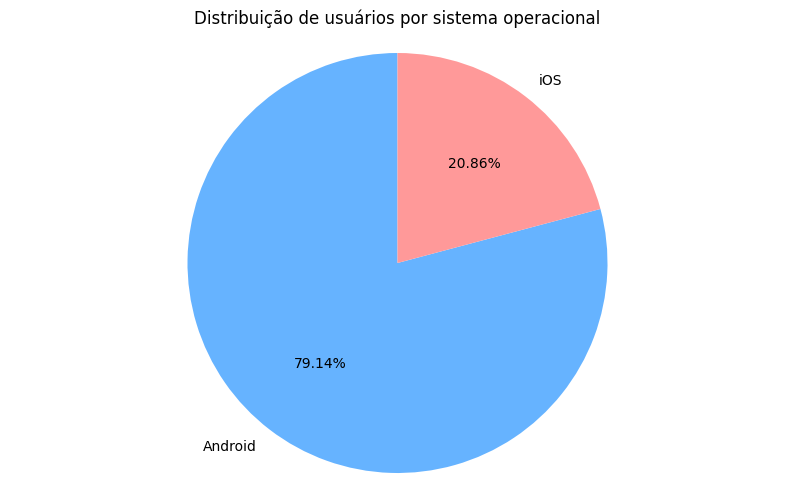

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.pie( # Configura o gráfico de pizza
    os_counts.values,
    labels = os_counts.index,
    autopct = '%1.2f%%',
    startangle = 90,
    colors = ["#66b3ff", "#ff9999"]
)

# Personalizar o gráfico
ax.axis('equal')    # Corrige o formato para um círculo
plt.title("Distribuição de usuários por sistema operacional")

plt.show()

### Média de consumo de bateria por dispositivo

In [22]:
# Calcular a média do consumo de bateria por modelo
battery_drain_avg = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().reset_index()
battery_drain_avg.describe()

,Battery Drain (mAh/day)
count,5.000000
mean,1524.497504
std,41.914452
min,1475.676056
25%,1504.571429
50%,1523.849624
75%,1528.876712
max,1589.513699


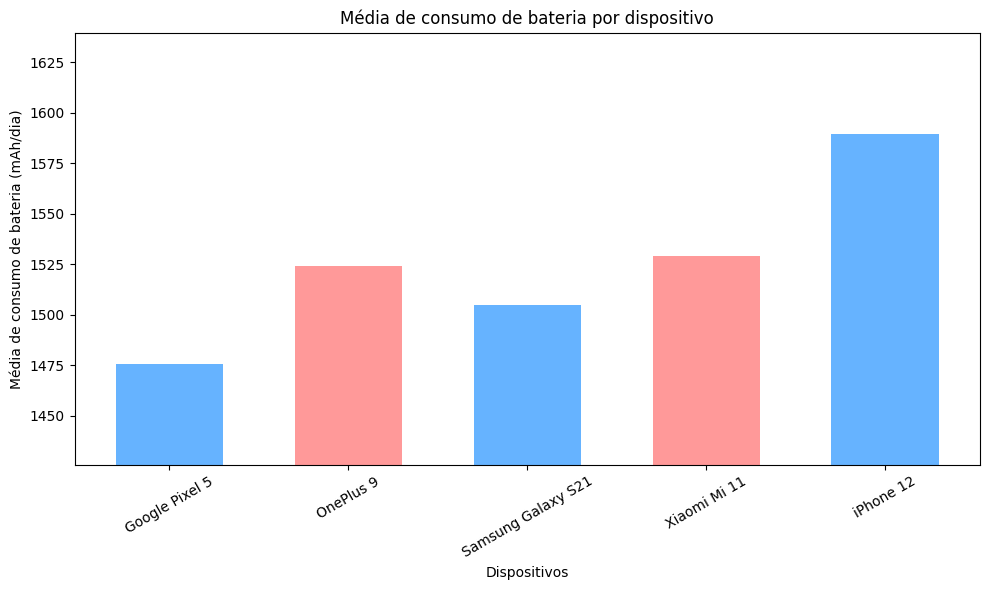

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    battery_drain_avg['Device Model'], 
    battery_drain_avg['Battery Drain (mAh/day)'], 
    color = ['#66b3ff', '#ff9999'],
    width = 0.6
)
# Personalizar o gráfico
plt.title("Média de consumo de bateria por dispositivo")
plt.xlabel("Dispositivos")
plt.ylabel("Média de consumo de bateria (mAh/dia)")
ax.set_ylim([min(battery_drain_avg['Battery Drain (mAh/day)']) - 50, max(battery_drain_avg['Battery Drain (mAh/day)']) + 50])   # Ajusta o intervalo do eixo y
plt.xticks(rotation = 30) # Rotaciona os rótulos para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

### Tempo de tela médio por idade

In [24]:
# Calcular a média de idade de pessoas por tempo de tela
age_screen_time_avg = df.groupby('Age')['Screen On Time (hours/day)'].mean().reset_index()
age_screen_time_avg.describe()

,Age,Screen On Time (hours/day)
count,42.000000,42.000000
mean,38.500000,5.248213
std,12.267844,0.657702
min,18.000000,4.294118
25%,28.250000,4.732955
50%,38.500000,5.237179
75%,48.750000,5.554699
max,59.000000,6.870588


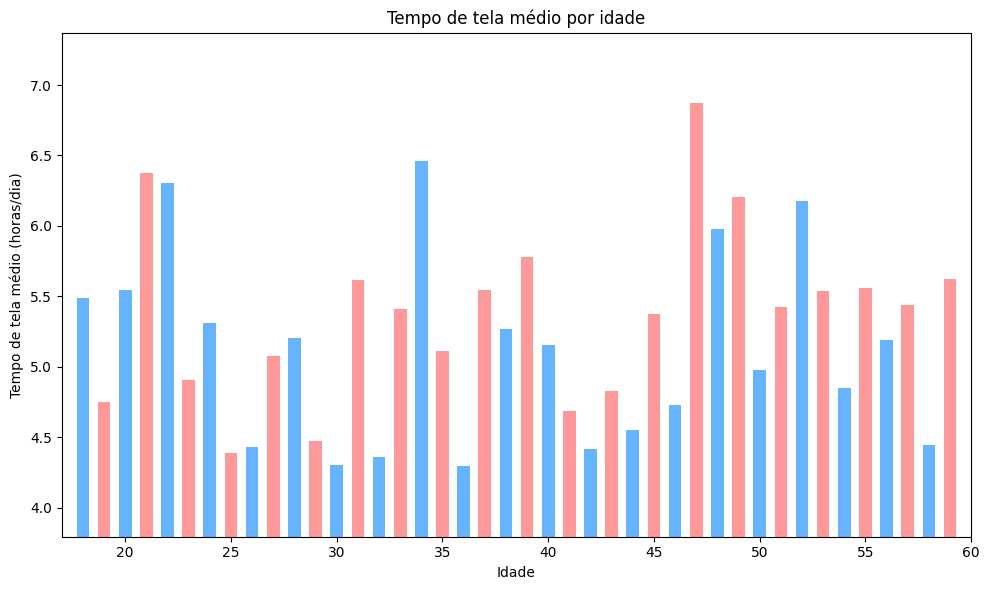

In [95]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    age_screen_time_avg['Age'],
    age_screen_time_avg['Screen On Time (hours/day)'],
    color = ['#66b3ff', '#ff9999'],
    width = 0.6
)

# Personalizar o gráfico
plt.title("Tempo de tela médio por idade")
plt.xlabel("Idade")
plt.ylabel("Tempo de tela médio (horas/dia)")
ax.set_xlim([min(age_screen_time_avg['Age']) - 1, max(age_screen_time_avg['Age']) + 1])   # Ajusta o intervalo do eixo x
ax.set_ylim([min(age_screen_time_avg['Screen On Time (hours/day)']) - 0.5, max(age_screen_time_avg['Screen On Time (hours/day)']) + 0.5])   # Ajusta o intervalo do eixo y
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

### Contagem de pessoas por idade

In [5]:
# Calcular a quantidade de pessoas por idade
age_count = df['Age'].value_counts().sort_index()
age_count.describe()

count    42.000000
mean     16.666667
std       4.141796
min       9.000000
25%      14.000000
50%      17.000000
75%      19.000000
max      25.000000
Name: count, dtype: float64

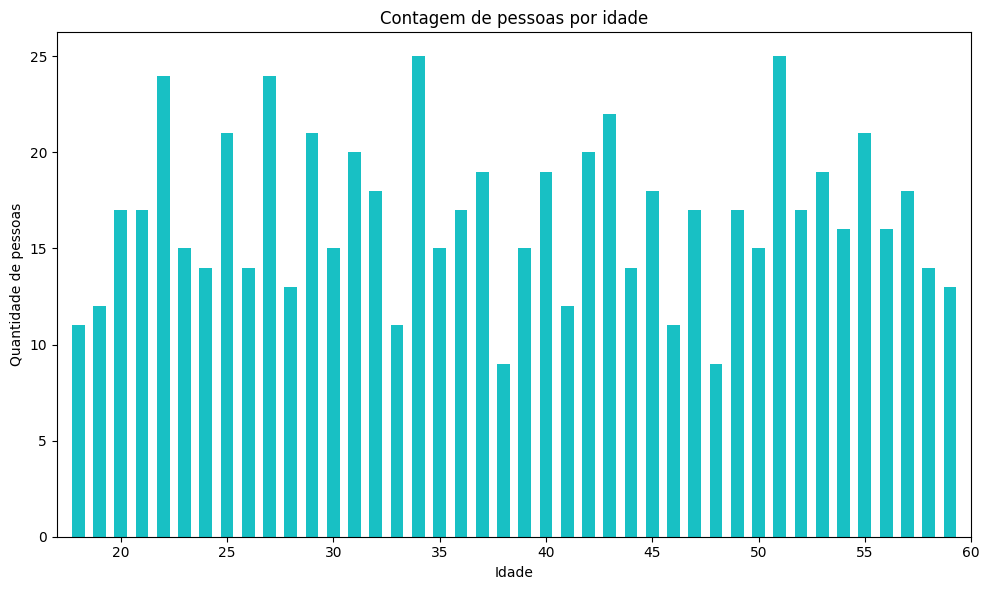

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    age_count.index,
    age_count.values,
    color = ['#18c0c4'],
    width = 0.6
)

# Personaliza o gráfico
plt.title("Contagem de pessoas por idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade de pessoas")
ax.set_xlim([min(age_count.index) - 1, max(age_count.index) + 1]) # Ajusta o intervalo do eixo x
plt.tight_layout()

plt.show()

### Tempo de tela médio por gênero

In [26]:
# Calcular a média do tempo de tela por gênero
gender_screen_time_avg = df.groupby('Gender')['Screen On Time (hours/day)'].mean().reset_index()
gender_screen_time_avg.describe()

,Screen On Time (hours/day)
count,2.000000
mean,5.272276
std,0.015508
min,5.261310
25%,5.266793
50%,5.272276
75%,5.277759
max,5.283242


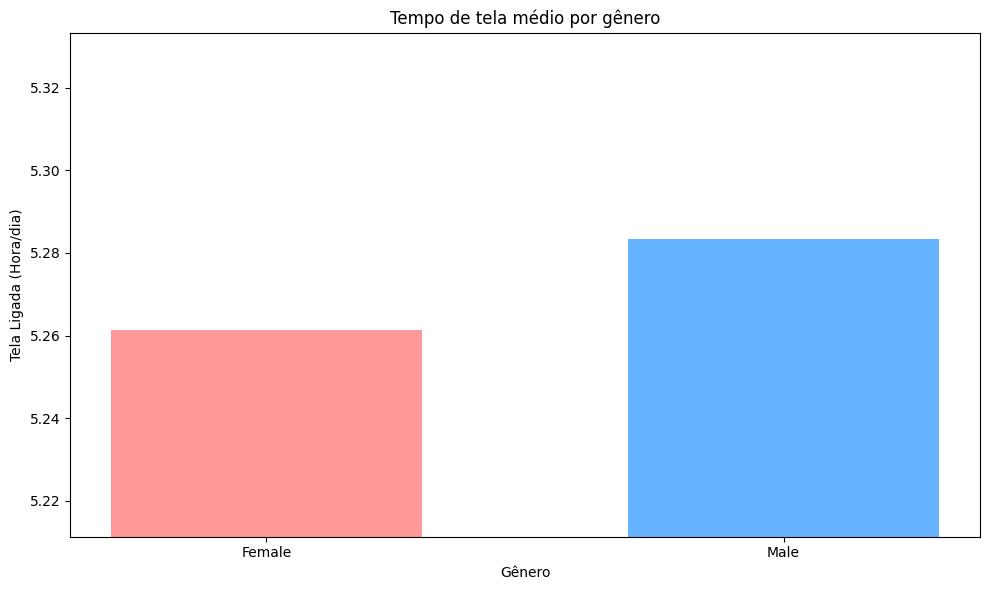

In [98]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    gender_screen_time_avg['Gender'],
    gender_screen_time_avg['Screen On Time (hours/day)'],
    color = ['#ff9999', '#66b3ff'],
    width = 0.6
)

# Personalizar o gráfico
plt.title("Tempo de tela médio por gênero")
plt.xlabel("Gênero")
plt.ylabel("Tela Ligada (Hora/dia)")
ax.set_ylim([min(gender_screen_time_avg['Screen On Time (hours/day)']) - 0.05, max(gender_screen_time_avg['Screen On Time (hours/day)']) + 0.05])   # Ajusta o intervalo do eixo y
plt.tight_layout()  # Ajusta o layout para evitar sobreposições

plt.show()

### Tempo de tela médio por faixa etária

In [56]:
# Configuração dos filtros de idade
df_filtered_1 = df[df['Age'] <= 20]
df_filtered_2 = df[(df['Age'] > 20) & (df['Age'] <= 30)]
df_filtered_3 = df[(df['Age'] > 30) & (df['Age'] <= 40)]
df_filtered_4 = df[(df['Age'] > 40) & (df['Age'] <= 50)]
df_filtered_5 = df[(df['Age'] > 50)]

In [58]:
# Calcular a média do tempo de tela para cada filtro de idade
mean_filtered_1 = df_filtered_1['Screen On Time (hours/day)'].mean()
mean_filtered_2 = df_filtered_2['Screen On Time (hours/day)'].mean()
mean_filtered_3 = df_filtered_3['Screen On Time (hours/day)'].mean()
mean_filtered_4 = df_filtered_4['Screen On Time (hours/day)'].mean()
mean_filtered_5 = df_filtered_5['Screen On Time (hours/day)'].mean()

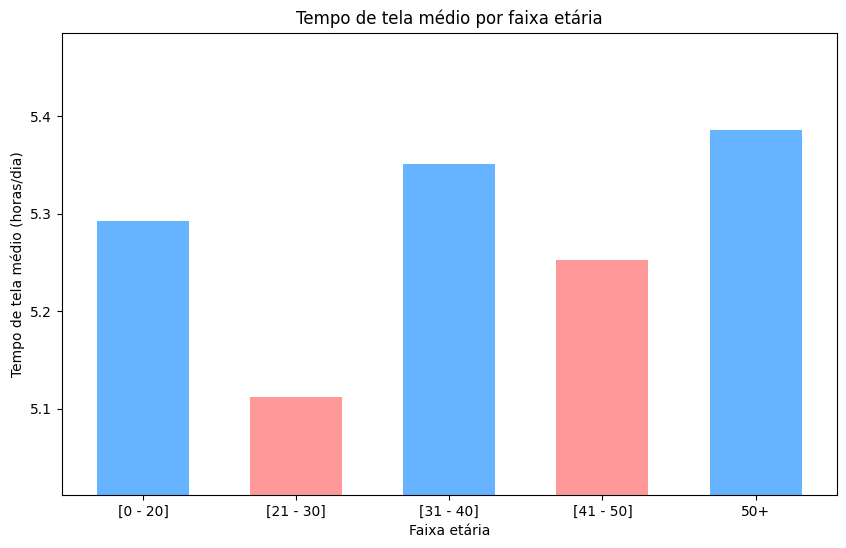

In [59]:
# Definição dos eixos do gráfico
x = ['[0 - 20]', '[21 - 30]', '[31 - 40]', '[41 - 50]', '50+']
y = [
    mean_filtered_1,
    mean_filtered_2,
    mean_filtered_3,
    mean_filtered_4,
    mean_filtered_5
]
y = [0 if pd.isna(val) else val for val in y]   # Substitui NaN por 0

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    x,
    y,
    color = ['#66b3ff', '#ff9999'],
    width = 0.6
)

# Personalizar o gráfico
plt.title('Tempo de tela médio por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Tempo de tela médio (horas/dia)')
ax.set_ylim([min(y) - 0.1, max(y) + 0.1])   # Ajusta o intervalo do eixo y

plt.show()

### Distribuição de usuários por faixa etária

In [76]:
# Contagem de usuários por faixa etária
counts = [
    len(df_filtered_1),
    len(df_filtered_2),
    len(df_filtered_3),
    len(df_filtered_4),
    len(df_filtered_5)
]
counts = [0 if pd.isna(val) else val for val in counts]   # Substitui NaN por 0
counts

[40, 178, 168, 155, 159]

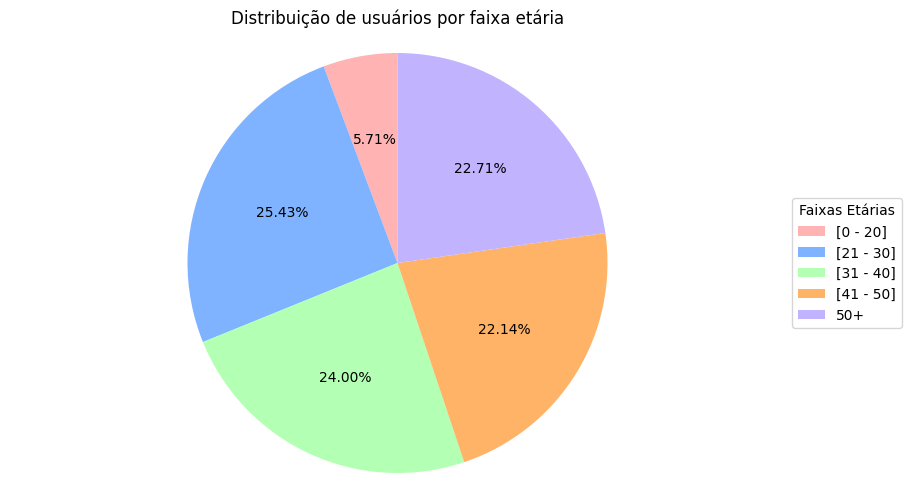

In [67]:
fig, ax = plt.subplots(figsize = (10, 6))
wedeges, texts, autotexts = ax.pie( # Configura o gráfico de pizza
    counts,
    autopct = '%1.2f%%',
    startangle = 90,
    colors = ["#ffb3b3","#80b3ff","#b3ffb3","#ffb366","#c2b3ff"]
)

# Personalizar o gráfico
ax.axis('equal')    # Corrige o formato para um círculo
# Adicionar a legenda fora do gráfico
ax.legend(
    wedeges,    # Referência às fatias do gráfico
    x,          # Texto da legenda
    title = "Faixas Etárias",
    loc = "center left",            # Localização da legenda
    bbox_to_anchor=(1, 0, 0.5, 1)   # Ajusta a posição da legenda (fora do gráfico)
)
plt.title("Distribuição de usuários por faixa etária")

plt.show()

### Distribuição de usuários por gênero

In [77]:
# Configuração dos filtros de gênero
df_gender_male = df[df['Gender'] == "Male"]
df_gender_female = df[df['Gender'] == "Female"]

labels = ["Masculino", "Feminino"]

# Contagem de usuários por gênero
counts = [
    len(df_gender_male),
    len(df_gender_female)
]
counts = [0 if pd.isna(val) else val for val in counts]   # Substitui NaN por 0
counts

[364, 336]

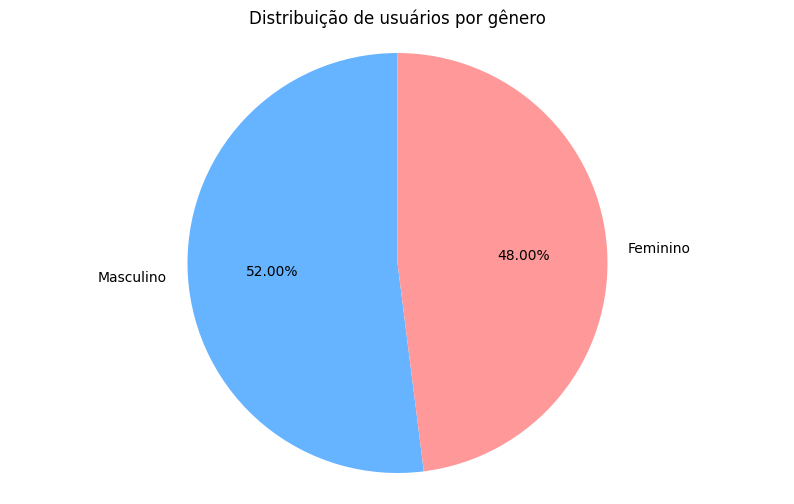

In [73]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.pie( # Configura o gráfico de pizza
    counts,
    labels = labels,
    autopct = '%1.2f%%',
    startangle = 90,
    colors = ["#66b3ff", "#ff9999"]
)

# Personalizar o gráfico
ax.axis('equal')    # Corrige o formato para um círculo
plt.title("Distribuição de usuários por gênero")

plt.show()

### Média de aplicativos instalados por faixa etária

In [75]:
# Calcular a média dos aplicativos instalados para cada filtro de idade
mean_apps_1 = df_filtered_1['Number of Apps Installed'].mean()
mean_apps_2 = df_filtered_2['Number of Apps Installed'].mean()
mean_apps_3 = df_filtered_3['Number of Apps Installed'].mean()
mean_apps_4 = df_filtered_4['Number of Apps Installed'].mean()
mean_apps_5 = df_filtered_5['Number of Apps Installed'].mean()

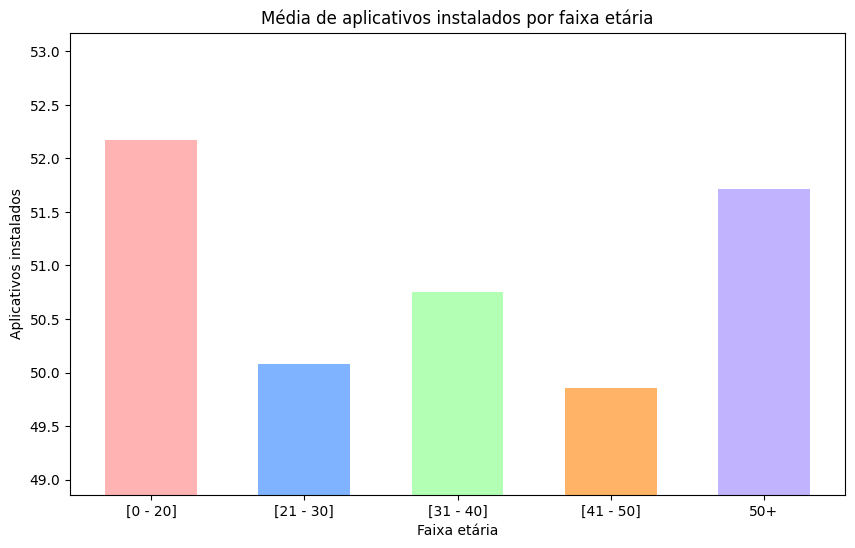

In [83]:
# Definição dos eixos do gráfico
y = [
    mean_apps_1,
    mean_apps_2,
    mean_apps_3,
    mean_apps_4,
    mean_apps_5
]
y = [0 if pd.isna(val) else val for val in y]   # Substitui NaN por 0

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar( # Configura o grafico de barras
    x,
    y,
    color = ["#ffb3b3","#80b3ff","#b3ffb3","#ffb366","#c2b3ff"],
    width = 0.6
)

# Personalizar o gráfico
plt.title('Média de aplicativos instalados por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Aplicativos instalados')
ax.set_ylim([min(y) - 1, max(y) + 1])   # Ajusta o intervalo do eixo y

plt.show()